In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from util import show_image

In [2]:
img_path = '/Users/jeonhyeonbin/Documents/CSED551/assn1/assn2/images/cat.jpg'

In [3]:
img_rgb = cv2.imread(img_path, cv2.IMREAD_COLOR).astype(np.float32)/255.       # RGB
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)/255.    # grayscale

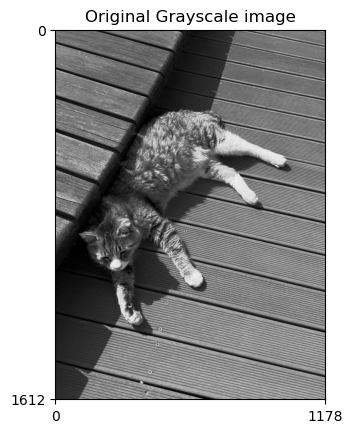

In [4]:
show_image(img_gray, 'Original Grayscale image')

In [5]:
def ideal_lpf_gray(img, cutoff, pad_size=10):
    """grayscale 이미지에 대해 패딩한 후 ideal lpf를 적용하는 함수

    Args:
        img (2D numpy array): 그레이스케일 이미지
        cutoff (real): 필터 반지름
        pad_size (int, optional): 패딩 크기
    """
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_CONSTANT, value=0)

    f = np.fft.fft2(padded_img) # 푸리에 변환
    fs = np.fft.fftshift(f) # 중앙으로 주파수 성분 재배열
    
    # build lpf mask
    M, N = padded_img.shape
    center_x, center_y = M//2, N//2
    lpf = np.zeros((M,N), dtype=np.float32)
    
    for i in range(M):
        for j in range(N):
            if np.sqrt((i-center_x)**2 + (j-center_y)**2) <= cutoff:
                lpf[i, j] = 1
    
    f_ = fs * lpf # 필터적용
    
    inv = np.fft.ifftshift(f_)  # 중앙에 배치되어있던 배열 복원
    inv_img = np.fft.ifft2(inv) # 역푸리에 변환
    inv_img = np.abs(inv_img)   # 실수값으로 변환
    
    return inv_img[pad_size:-pad_size, pad_size:-pad_size]

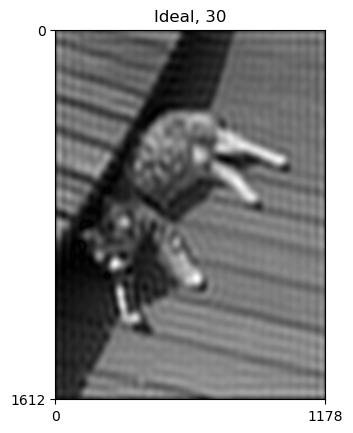

In [6]:
show_image(ideal_lpf_gray(img_gray, 30, 10), 'Ideal, 30')

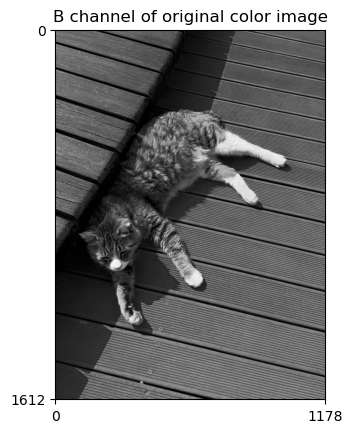

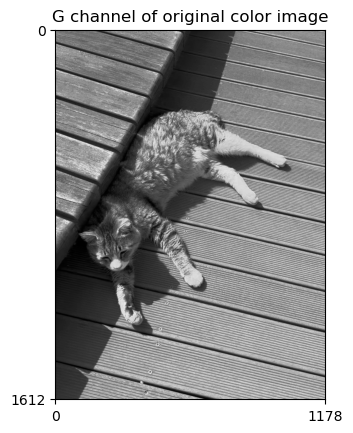

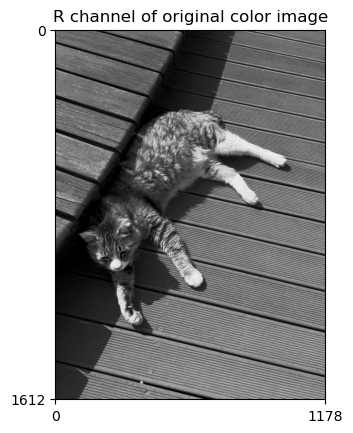

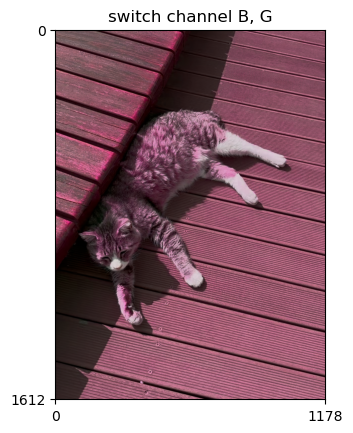

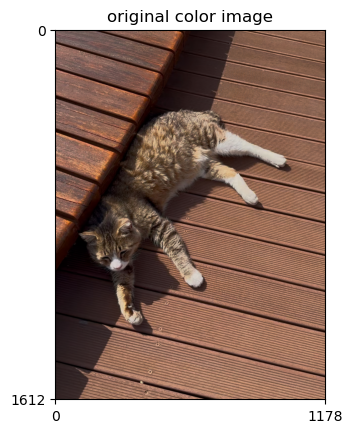

In [7]:
img_b, img_g, img_r = cv2.split(img_rgb)

show_image(img_b, 'B channel of original color image')
show_image(img_r, 'G channel of original color image')
show_image(img_g, 'R channel of original color image')

show_image(cv2.merge([img_g, img_b, img_r]), 'switch channel B, G')
show_image(img_rgb, 'original color image')

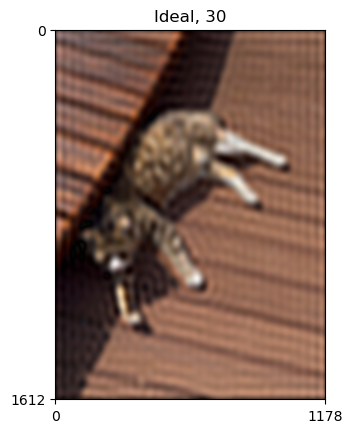

In [8]:
img_b_blur = ideal_lpf_gray(img_b, 30, 10)
img_g_blur = ideal_lpf_gray(img_g, 30, 10)
img_r_blur = ideal_lpf_gray(img_r, 30, 10)

# merge하기 전에 각 채널을 float32로 변환
img_b_blur = img_b_blur.astype(np.float32)
img_g_blur = img_g_blur.astype(np.float32)
img_r_blur = img_r_blur.astype(np.float32)

# 채널 merge (BGR 순서)
img_rgb_blur = cv2.merge([img_b_blur, img_g_blur, img_r_blur])

show_image(img_rgb_blur, 'Ideal, 30')

In [9]:
def show_spectrum(img):
    """주어진 이미지의 주파수 성분을 도시함

    Args:
        img (numpy array): grayscale/RGB image
    """

    if img.ndim == 3:
        height, width, _= img.shape
        channels = cv2.split(img)       # 채널별 분리
        names = ['R', 'G', 'B']
        fig, axes = plt.subplots(1, 3)
        for i, channel in enumerate(channels):
            # 각 채널에 대해 2차원 FFT 수행
            f = np.fft.fft2(channel)
            # 중심부에 주파수 성분이 오도록 shift 적용
            fshift = np.fft.fftshift(f)
            # 로그 스케일을 적용하여 시각화를 용이하게 함
            spectrum = 20 * np.log(np.abs(fshift) + 1)
            axes[i].imshow(spectrum, cmap='gray')
            axes[i].set_title(f'{names[i]} channel')
            axes[i].axis('on')
            axes[i].set_xticks([0, width - 1])
            axes[i].set_yticks([0, height - 1])
        plt.tight_layout()
        plt.show()
            
        
    else:
        height, width, = img.shape
        f = np.fft.fft2(img)
        spectrum = np.log(np.abs(f))
        plt.imshow(np.fft.fftshift(spectrum), cmap = 'gray')
        plt.xticks([0, width - 1])
        plt.yticks([0, height - 1])
        plt.show()

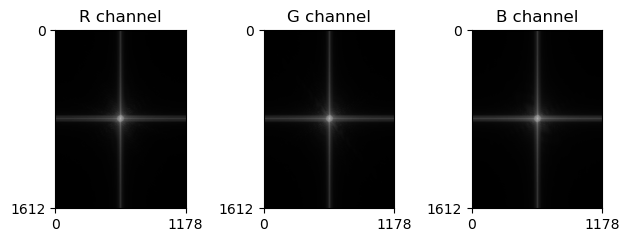

In [10]:
show_spectrum(img_rgb_blur)

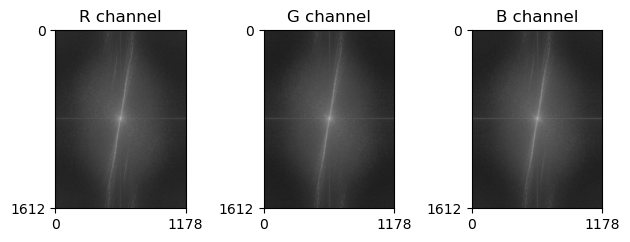

In [11]:
show_spectrum(img_rgb)

In [12]:
def ideal_lpf_rgb(img, cutoff, pad_size=10):
    b, g, r = cv2.split(img) # OpenCV는 bgr순서
    
    b_ = ideal_lpf_gray(b, cutoff, pad_size=pad_size).astype(np.float32)
    g_ = ideal_lpf_gray(g, cutoff, pad_size=pad_size).astype(np.float32)
    r_ = ideal_lpf_gray(r, cutoff, pad_size=pad_size).astype(np.float32)
    
    return cv2.merge([b_, g_, r_])


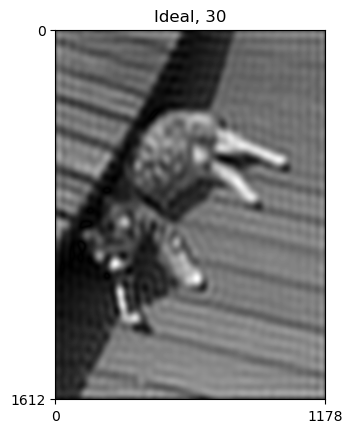

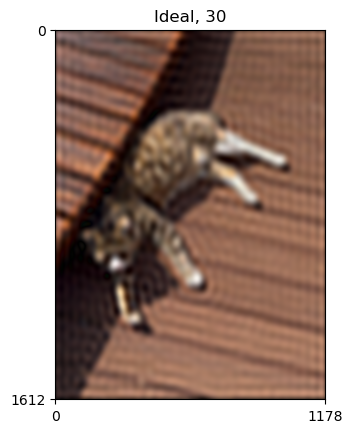

In [13]:
show_image(ideal_lpf_gray(img_gray, 30, 15), 'Ideal, 30')
show_image(ideal_lpf_rgb(img_rgb, 30, 15), 'Ideal, 30')